- Student name: Wambui Thuku
- Student pace: DSC-PT03
- Scheduled project review date/time: 19/07/2023
- Instructor name:Noah Kandie
- Blog post URL:

![Image Description](Downloads\\iStock-1288494001-1688x1125.jpg)

# Predicting Seasonal Flu Vaccination Status

# Overview

The goal of this project is to predict how likely individuals are to receive their flu vaccines. Specifically, we’ll be predicting for the `seasonal_vaccine` target variable. An understanding of how people’s backgrounds, opinions, and health behaviors can provide guidance for future public health efforts and how they are related to their personal vaccination patterns.

# Business Understanding

The aim of this project is to predict whether individuals received the seasonal flu vaccine using data obtained from [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/). By understanding the factors that influence vaccine uptake, public health efforts can be better tailored by the Ministry of Health in Kenya, to increase vaccination rates and protect the population against influenza. Other benefits from this analysis include:

- Public Health Campaigns: Insights from this analysis can guide the development of targeted public health campaigns to promote flu vaccination, addressing specific concerns or barriers identified among different population segments.
- Resource Allocation: Understanding the demographic or socio-economic factors associated with vaccine uptake can help allocate resources effectively, ensuring that vulnerable populations receive adequate access to flu vaccines.
- Policy Recommendations: Findings from the analysis can inform policymakers on the need for specific policies or interventions to increase flu vaccination rates, such as workplace vaccination programs or community outreach initiatives.


### Business Objectives:

1. To determine the key factors that influence an individual's decision to get vaccinated for the seasonal flu.

2. To determine how preventive measures impact an individual's decision to get vaccinated.

3. To develop a robust predictive model that accurately estimates the probability of individuals receiving their seasonal flu vaccines.

# Data Understanding

Data files were obtained from [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/)

- The records/rows contain the results of a survey conducted in 2009 which collected some basic demograpahic information as well as information specific to an individual's risk of developing flu-related complications, for instance, having a chronic medical condition, the level of concern/knowledge about the flu, and also some behavioral attributes like buying a face mask and avoiding close contact with people with flu-like symptoms.
- Labels are binary variables, with **1** indicating that a person **received** the respective flu vaccine and **0** indicating that a person **did not receive** the respective flu vaccine.
- Majority of data is categorical (binary).

# Data Description
- h1n1_concern - Level of concern about the H1N1 flu.
 - 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
 - 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
 - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
 - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
 - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
 - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
 - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
 - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

# Metric of Success

Our metric of success, which we will be optimizing for, is the **ROC-AUC** score (Receiver Operating Characteristic - Area Under the Curve). 

The ROC-AUC score allows us to analyze the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at different classification thresholds.

By examining the ROC curve and choosing an appropriate threshold, we can balance the prediction of true positives (correctly identifying those who will uptake the vaccine) and true negatives (correctly identifying those who will not uptake the vaccine), which is crucial in healthcare planning, decision-making and targeted interventions.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

#### Load Data

And also get a feel for the data and its characteristics.

This section also involves the merging of the two datasets, i.e. the `features_df` and the `labels_df` datasets.

In [2]:
# Load the dataset
features_df = pd.read_csv("training_set_features.csv", 
                          index_col="respondent_id")

labels_df = pd.read_csv("training_set_labels.csv",
                       index_col="respondent_id")
validation_df = pd.read_csv("test_set_features.csv",
                       index_col="respondent_id")

In [3]:
# Check the first and last 5 entries
features_df

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   
...                     ...             ...                        ...   
26702                   2.0             0.0                        0.0   
26703                   1.0             2.0                        0.0   
26704                   2.0             2.0                        0.0   
26705                   1.0             1.0                        0.0   
26706                   0.0             0.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   
...                             ...                   ...   
26702                           1.0                   0.0   
26703                           1.0                   0.0   
26704                           1.0                   1.0   
26705                           0.0                   0.0   
26706                           1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   
...                              ...                          ...   
26702                            0.0                          0.0   
26703                            1.0                          0.0   
26704                            1.0                          1.0   
26705                            0.0                          0.0   
26706                            0.0                          0.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   
...                                ...                    ...   
26702                              1.0                    0.0   
26703                              0.0                    0.0   
26704                              0.0                    1.0   
26705                              0.0                    NaN   
26706                              0.0                    0.0   

               doctor_recc_h1n1  ...             income_poverty  \
respondent_id                    ...                              
0                           0.0  ...              Below Poverty   
1                           0.0  ...              Below Poverty   
2                           NaN  ...  <= $75,000, Above Poverty   
3                           0.0  ...              Below Poverty   
4                           0.0  ...  <= $75,000, Above Poverty   
...                         ...  ...         

In [4]:
# Check the rows and columns
features_df.shape

(26707, 35)

In [5]:
# Check the rows and columns
labels_df.shape

(26707, 2)

In [6]:
# Check the first and last 5 entries
labels_df

h1n1_vaccine  seasonal_vaccine
respondent_id                                
0                         0                 0
1                         0                 1
2                         0                 0
3                         0                 1
4                         0                 0
...                     ...               ...
26702                     0                 0
26703                     0                 0
26704                     0                 1
26705                     0                 0
26706                     0                 0

[26707 rows x 2 columns]

In [7]:
# Double-check that the rows between the features and the labels match up
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [8]:
# Merge the df's
merged_df = pd.concat([features_df, labels_df], axis=1)
merged_df.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
0                           0.0  ...          Own  Not in Labor Force   
1                           0.0  ...         Rent            Employed   
2                           NaN  ...          Own            Employed   
3                           0.0  ...         Rent  Not in Labor Force   
4                           0.0  ...          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  \
respondent_id                                                                   
0                             0.0                  NaN                    NaN   
1                             0.0             pxcmvdjn               xgwztkwe   
2                             0.0             rucpziij               xtkaffoo   
3                             0.0                  NaN                    NaN   
4                             0.0             wxleyezf               emcorrxb   

               h1n1_vaccine  seasonal_vaccine  
respondent_id                                  
0                         0                 0  
1                         0                 1  
2                         0                 0  
3                         0                 1  
4                         0                 0  

[5 rows x 37 columns]

In [9]:
# Check the metadata of the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

* From the summary above it's noted that there are 26707 rows and 35 columns in the features dataset and the labels dataset having 26707 rows and 2 columns.
* The two datasets were merged resulting to 26707 rows and 37 columns. 
* The information of the dataset null values were also noted as most of the columns had variations from 26707 rows from the checked shape. Additionally the datatypes consist of 23 columns of float type, 2 interger(int64) columns and 12 columns of object datatype.

In [10]:
# Check the descriptive statistics
merged_df.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
count           26579.000000      24547.000000  ...   
mean                0.677264          0.220312  ...   
std                 0.467531          0.414466  ...   
min                 0.000000          0.000000  ...   
25%                 0.000000          0.000000  ...   
50%                 1.000000          0.000000  ...   
75%                 1.000000          0.000000  ...   
max                 1.000000          1.000000  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.00

#### *Inference*

- **Target variable**
 - `seasonal_vaccine`: The sample population shows that 46.5% of respondents received the vaccine, and therefore 53.5% did not receive the seasonal flu vaccine during the survey year (2009).
 
- **Other features**
 - `opinion_seas_vacc_effective`: Has a mean rating of ~4 (Somewhat effective). This means that majority of respondents believe the flu vaccine to be somewhat effective. 
 - `opinion_seas_risk`: Has a mean rating of ~3 (Don't know). This means that majority of respondents don't know their risk of getting sick with seasonal flu without vaccine.
 - `opinion_seas_sick_from_vacc`: Has a mean rating of ~2 (Not very worried). This means that majority of respondents are not very worried about getting sick from taking seasonal flu vaccine.
 - 28% of respondents have a chronic medical condition (`chronic_med_condition`) that puts them at high risk for developing flu-related complications.
 - 11% of the sample population are health workers (`health_worker`)
 - Relatively large number of respondents reported to be practising some behavioral attributes that reduce their risk of contracting the seasonal flu virus, eg. `behavioral_avoidance`-- 73% of respondents reported to have avoided close contact with others with flu-like symptoms. `behavioral_wash_hands`-- 83% of respondents frequently washed hands or used hand sanitizer. `behavioral_touch_face`-- 68% of respondents avoided touching eyes, nose, or mouth.

#### Check for Class Imbalance

In [11]:
# For the h1n1_vaccine category
merged_df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

There is presence of class imbalance in the `h1n1_vaccine` target variable.

In [12]:
# For the seasonal_vaccine category
merged_df['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

`seasonal_vaccine` looks good in terms of class distribution.

# Data Cleaning and Preparation

This section entails checking the percentage of the null values and duplicates in the whole dataset.

In [13]:
# check for null values percentages
merged_df.isna().mean() * 100

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

- We will use 30% as the threshold for null frequency in the columns to decide whether to consider the column for analysis or not.

- Sometimes columns with greater null percentage have more semantic meaning and thus they cannot be ignored.

- Here we can see `health_insurance`, `employment_industry` and `employment_occupation` columns with approximately **46%, 50% and 50%** missing values percentages respectively, and thus they cannot be used for analysis as nearly half of the data is missing in those columns.

In [14]:
# Drop columns with high missing values percentages
merged_df.drop(columns=['health_insurance', 'employment_industry', 
                        'employment_occupation'], inplace=True)

In [15]:
# For categorigal data, impute missing with mode
for column in ['age_group','education','race','sex','income_poverty','marital_status',
               'rent_or_own','employment_status','hhs_geo_region','census_msa']:
    merged_df[column].fillna(merged_df[column].mode()[0], inplace=True)

In [16]:
# For numeric data, impute with median
impute=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance',
        'behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings',
        'behavioral_outside_home','behavioral_touch_face','doctor_recc_h1n1'
        ,'doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker',
        'opinion_h1n1_vacc_effective'
        ,'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective',
        'opinion_seas_risk','opinion_seas_sick_from_vacc',
        'household_adults','household_children','h1n1_vaccine','seasonal_vaccine']

for i in impute:
    merged_df[i].fillna(merged_df[i].median(),inplace=True)

From the above analysis we have imputed the mode in categorical data and median in the numeric dataset.

In [17]:
# Check for duplicates
merged_df.duplicated().sum()

1

- There was no presence of duplicates in the dataset.

- When checking for outliers, we found that it does not bring out any meaningful information since majority of our features are categorical encoded as 0 and 1.

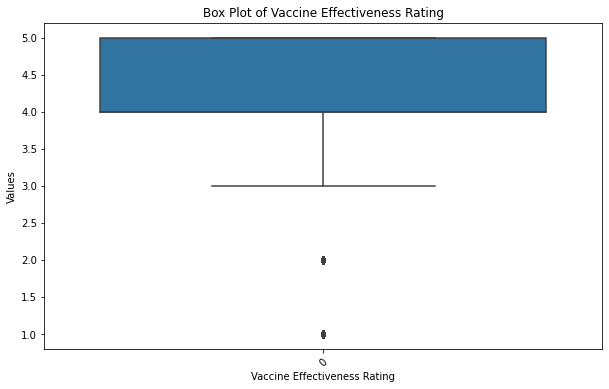

In [18]:
# Column to plot
columns_to_plot = merged_df['opinion_seas_vacc_effective']

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=columns_to_plot)
plt.title('Box Plot of Vaccine Effectiveness Rating')
plt.xlabel('Vaccine Effectiveness Rating')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

We will drop the features related to H1N1 from our dataset, since we don't require them for our analysis purposes.

In [19]:
merged_df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

In [20]:
# Drop columns with H1N1 information
merged_df.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
                        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                        'opinion_h1n1_sick_from_vacc'], inplace=True)

# Exploratory Data Analysis

In this section, we will examine the relationship between the variables using univariate, bivariate and multivariate analysis.

## Univariate Analysis

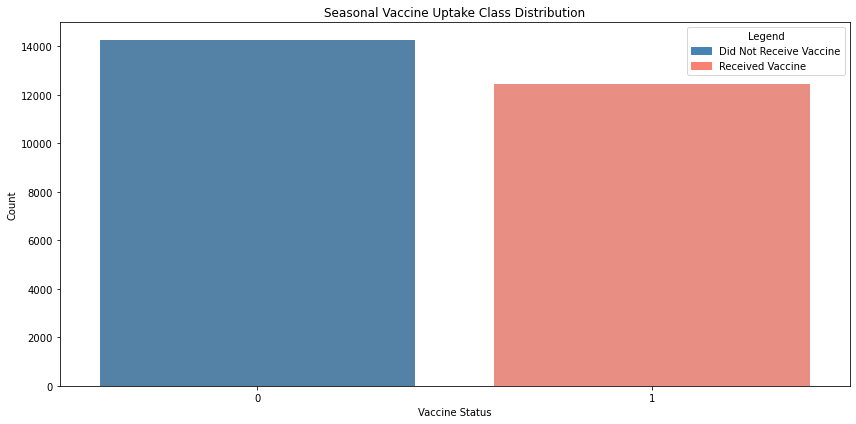

In [21]:
# Checking for class distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='seasonal_vaccine', data=merged_df, ax=ax, palette=["steelblue", "salmon"])

ax.set_title('Seasonal Vaccine Uptake Class Distribution')
ax.set_xlabel('Vaccine Status')
ax.set_ylabel('Count')

# Add separate legend labels for each class
legend_labels = ['Did Not Receive Vaccine', "Received Vaccine"]
colors = ["steelblue", "salmon"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels, title='Legend')

plt.tight_layout()
plt.savefig('Visualization1')

#### *Inference*

From the above plot, approximately 14,000 people did not receive the seasonal flu vaccine, compared to approximately 12,000 people who received the vaccine.

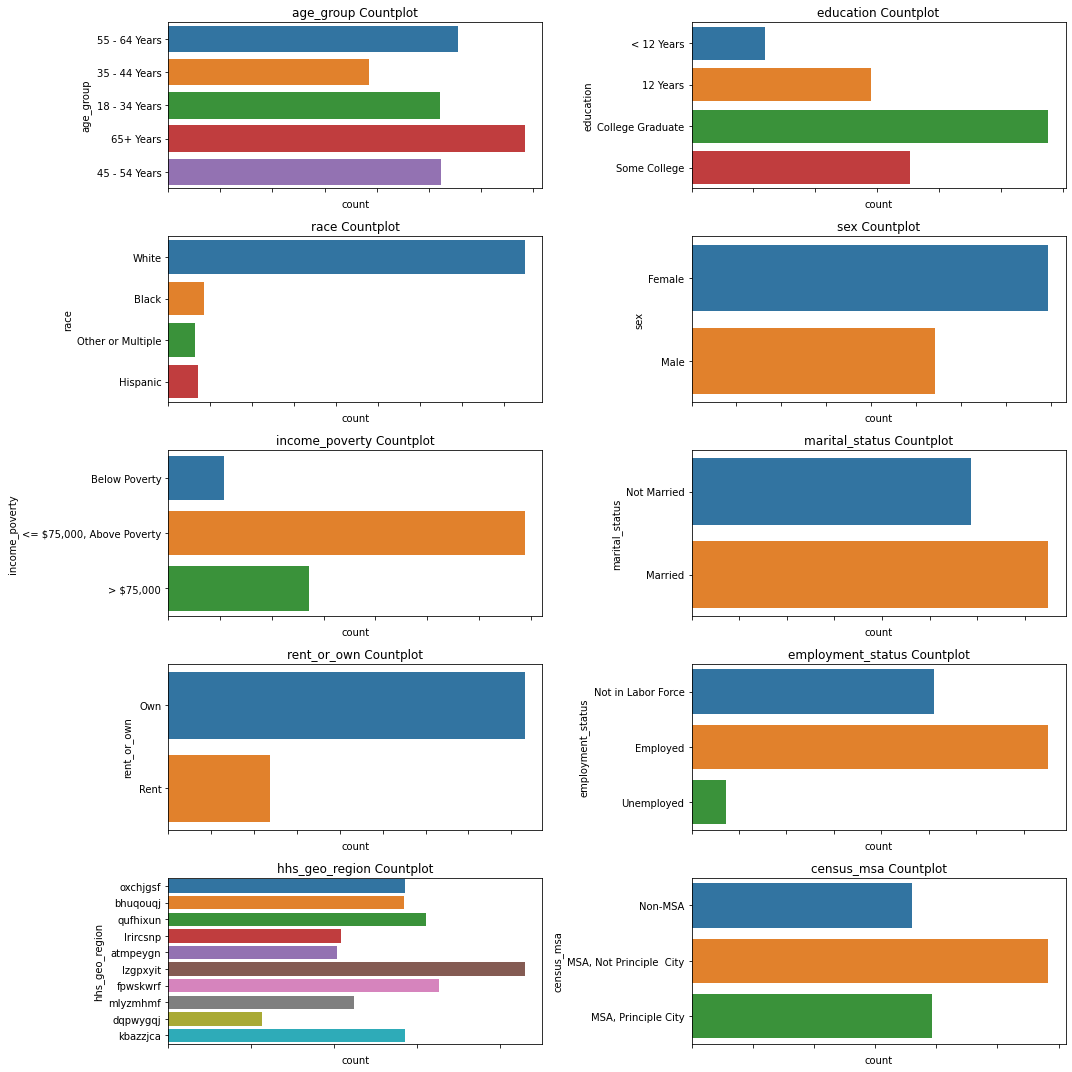

In [22]:
# Plotting for Individual features
num_plots = 10
cols = merged_df.dtypes[merged_df.dtypes == "object"].index[:num_plots]
fig, axs = plt.subplots(5, 2, figsize=(15, 15), tight_layout=True)
axs = axs.ravel()

for i, col in enumerate(cols):
    sns.countplot(y=merged_df[col], ax=axs[i])
    axs[i].set_title(col + " Countplot")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.show()

#### *Inference*

From the above plots we can observe the following:
1. The majority age group of the respondents is 65+ years, followed closely by 55-64 years.
2. The majority of the respondents were college graduates.
3. Most of the respondents were white.
4. Most of the respondents were female.
5. Majority of the respondents were employed.

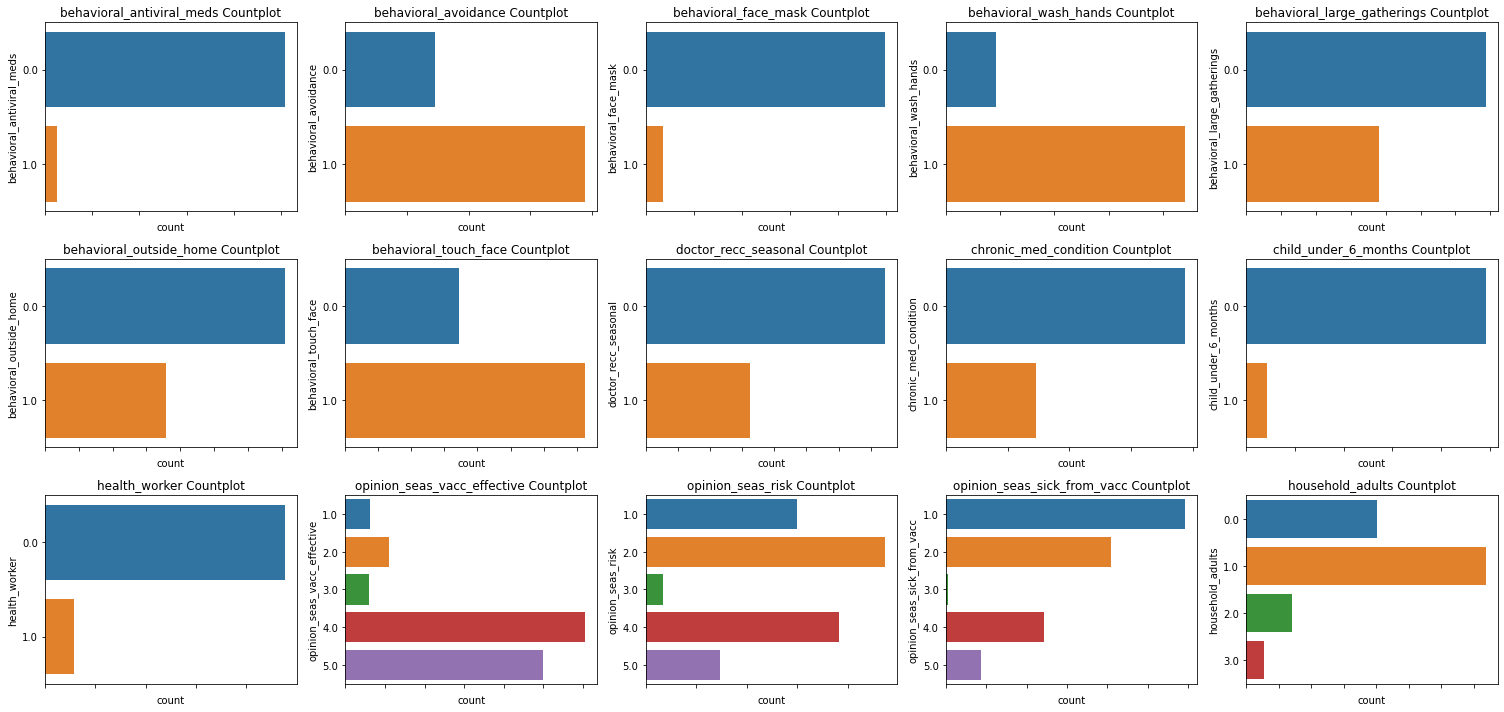

In [23]:
# Plots for other Individual features
num_plots = 15
cols = merged_df.dtypes[merged_df.dtypes != "object"].index[:num_plots]
fig, axs = plt.subplots(3, 5, figsize=(21, 10), tight_layout=True)
axs = axs.ravel()

for i, col in enumerate(cols):
    sns.countplot(y=merged_df[col], ax=axs[i])
    axs[i].set_title(col + " Countplot")
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

plt.show();

#### *Inference*

From the above plots we can observe the following:
1. The respondents who don't take antiviral medications were more than those who take the medications.
2. Most of the respondents were not health workers.
3. Majority of the respondents believed that their risk of getting sick with seasonal flu without the vaccine was somewhat low.
4. Majority of the respondents were of the opinion that the seasonal flu vaccine was somewhat effective.
5. Majority of the respondents were not worried at all about getting sick from taking the seasonal flu vaccine.

## Bivariate Analysis

Here we are checking for the relationship between various features and our target variable `seasonal_vaccine`.

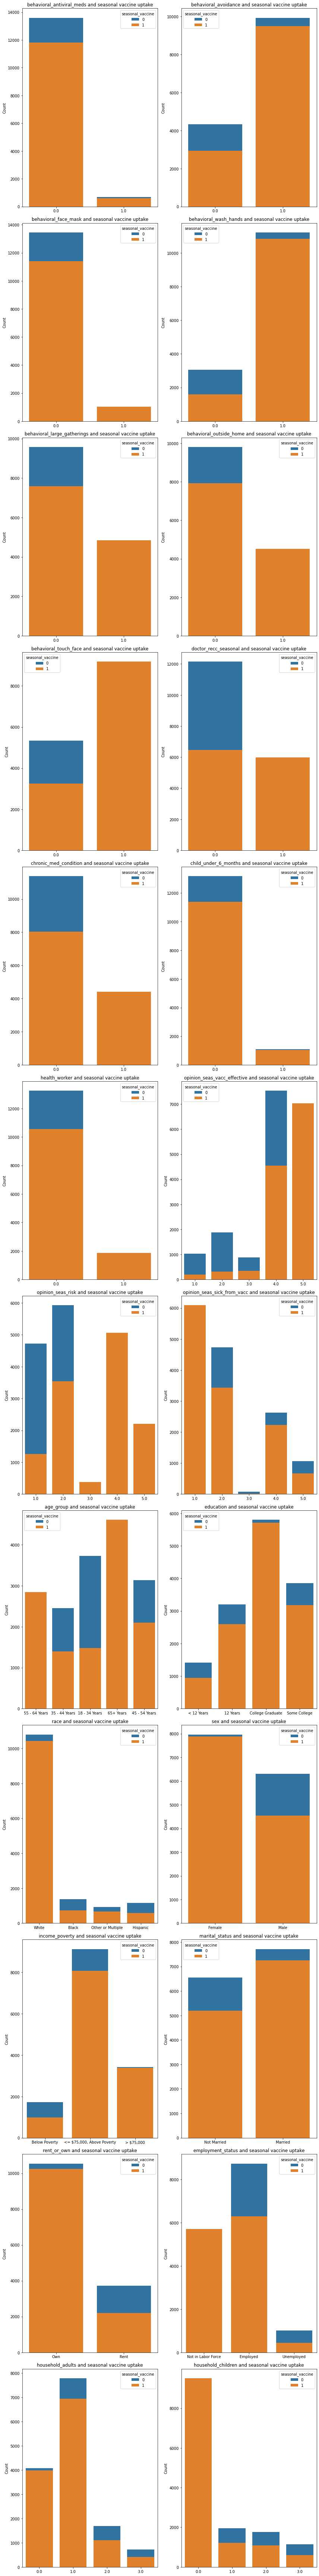

In [24]:
# List of columns to plot
columns = ['behavioral_antiviral_meds', 'behavioral_avoidance',
          'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
          'behavioral_outside_home', 'behavioral_touch_face',
          'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 
           'health_worker',
          'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
           'age_group', 'education', 'race', 'sex','income_poverty', 'marital_status', 
           'rent_or_own', 'employment_status', 'household_adults', 'household_children']

# Select columns for plotting
columns_to_plot = columns[:25]
# Determine the number of rows and columns for subplots
num_rows = (len(columns_to_plot) + 1) // 2
num_cols = 2
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8 * num_rows))
axes = axes.flatten()
# Iterate over the columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue='seasonal_vaccine', data=merged_df, ax=axes[i], dodge=False)
    axes[i].set_title(f"{column} and seasonal vaccine uptake")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
# Remove any empty subplots
if len(columns_to_plot) % 2 == 1:
    fig.delaxes(axes[-1])
# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

#### *Inference*

From the plots above we can denote the following:
1. Almost all of the respondents who were 55 years and above, had a high uptake of the seasonal flu vaccine.
2. There is a relationship between educational levels and vaccine uptake, in that people who have a higher educational level, i.e. college graduates, tend to have high vaccine uptakes.
3. Vaccine uptake was higher for females compared to the males.
4. Vaccine uptake was also higher for married people compared to the ones who are not married.
5. There was also a high vaccine uptake for respondents who were not in labor force, this includes the infants and the elderly.

## Multivariate Analysis

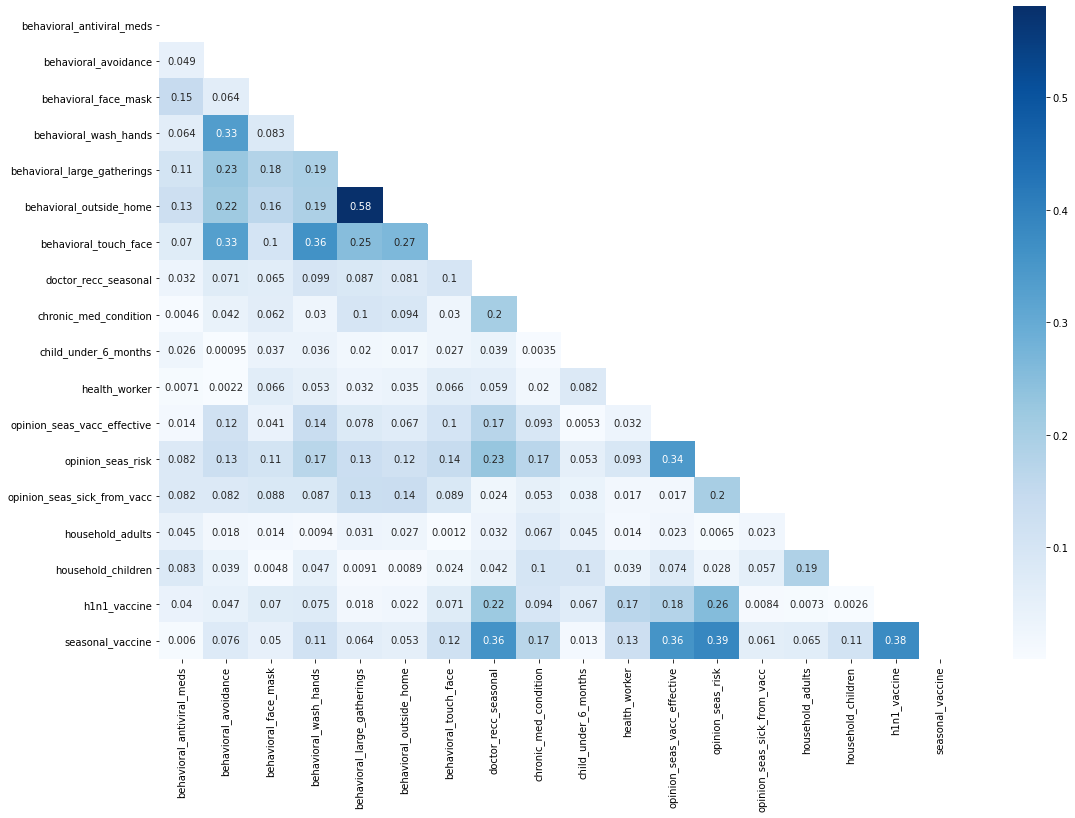

In [25]:
# Plot a correlation heatmap
corr = merged_df.corr().abs()
mask = np.zeros_like(corr)

# mask the heatmap to avoid redundancy 
mask[np.triu_indices_from(mask)] = True
mask
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask);
plt.savefig('Visualization2')

#### *Inference*

As shown from the heatmap, most of the variables have a low positive correlation, the highest being **0.58**, between `behavioral_outside_home` and `behavioral_large_gatherings`.

These correlations will not be a major issue since there are a couple of non-parametric models such as Decision Trees, and Ensemble methods such as Random Forest which make no assumption about the underlying distribution of data. The Random Forest is also able to capture complex nonlinear relationships, and handle interactions between features very well.

# Feature Engineering

### i) `behavior_score`

- Create a variable that represents how much an individual has done behaviorally to avoid the flu, aside from getting vaccinated, by summing up all behavioral variables. These are all binary columns with **1** representing **YES**, meaning the person has engaged in a behavior that reduces the risk of contracting the flu. By taking the sum across these columns, a higher score represents a more cautious, flu-conscious individual.

In [26]:
# Get the columns with `behavior` attributes
behavior_cols = [col for col in merged_df.columns if 'behavioral' in col]
behavior_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

In [27]:
# Create the `behavior_score` variable
merged_df['behavior_score'] = merged_df[behavior_cols].sum(axis=1)

In [28]:
# Check the count
merged_df[['behavior_score']].value_counts()

behavior_score
3.0               7331
2.0               4568
5.0               4546
4.0               4335
1.0               2656
0.0               2060
6.0               1040
7.0                171
dtype: int64

In [29]:
# Plot the distribution

# Get the value counts of 'behavior_score'
value_counts = merged_df['behavior_score'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values)

# Set labels and title
fig.update_layout(
    xaxis_title='Behavior Score',
    yaxis_title='Frequency',
    title='Histogram of Behavior Scores'
)

# Show the plot
fig.show()

#### *Inference*

From the above histogram, we can denote that:
- The majority, that is, 7331 individuals have practised at least 3 of the 7 behavioral attributes.
- The minority, that is, only 171 individuals have practised all the 7 behavioral attributes in a bid to minimize flu contractions.

### ii) `risk_overall`

- Create a variable that represents an individual's overall risk for developing flu-related complications. Some individuals are naturally at higher risk of developing complications. This includes people working in the healthcare industry, people 65 years and older, children 6 months or younger, and people with chronic medical conditions such as lung conditions, diabetes and heart conditions.

In [30]:
# Define a function to calculate the risk score
def calc_risk_score(row):
    risk = 0
    if row['health_worker'] == 1:
        risk += 1
    if row['age_group'] == '65+ Years':
        risk += 1
    if row['child_under_6_months'] == 1:
        risk += 1
    if row['chronic_med_condition'] == 1:
        risk += 1
    return risk

# Create the variable
merged_df['risk_overall'] = merged_df.apply(lambda x: calc_risk_score(x), axis=1)

In [31]:
# Check the count
merged_df[['risk_overall']].value_counts()

risk_overall
0               12286
1               10048
2                4007
3                 356
4                  10
dtype: int64

In [32]:
# Plot the distribution

# Get the value counts of 'risk_overall'
value_counts = merged_df['risk_overall'].value_counts().reset_index()

# Rename the columns
value_counts.columns = ['Risk Score', 'Frequency']

# Create a bar chart using Plotly
fig = px.bar(value_counts, x='Risk Score', y='Frequency')

# Set labels and title
fig.update_layout(
    xaxis_title='Risk Score',
    yaxis_title='Frequency',
    title='Histogram of Risk Scores'
)

# Show the plot
fig.show()

#### *Inference*

The risk score provides a numerical representation of the risk level for each individual based on the conditions considered. Higher risk scores indicate a higher risk level.
- 0 risk score: There are 12,286 rows in the DataFrame with a risk score of 0. These are likely individuals who do not meet any of the conditions considered in the calc_risk_score function.
- 1 risk score: There are 10,048 rows in the DataFrame with a risk score of 1. These individuals likely meet one of the conditions considered in the function.
- 2 risk score: There are 4,007 rows in the DataFrame with a risk score of 2. These individuals likely meet two of the conditions.
- 3 risk score: There are 356 rows in the DataFrame with a risk score of 3. These individuals likely meet three of the conditions.
- 4 risk score: There are 10 rows in the DataFrame with a risk score of 4. These individuals likely meet all four conditions.

### iii) `risk_category`

- Create a variable that bins individuals into either low-risk, medium-risk or high-risk categories based on their risk-score.

In [33]:
# Define a map
risk_mapping = {0: 'low risk', 1: 'medium risk', 2: 'high risk', 3: 'high risk', 4: 'high risk'}

# Create the variable
merged_df['risk_category'] = merged_df['risk_overall'].replace(risk_mapping)

In [34]:
# Check the count
merged_df['risk_category'].value_counts()

low risk       12286
medium risk    10048
high risk       4373
Name: risk_category, dtype: int64

# MODELING

## Defining a Function for Modeling

- Define a function and wrap our whole modeling process into a pipeline. This approach allows us to reuse the function for various classifiers by simply passing the appropriate data and `model` object.
- The function also takes in an argument `param_grid`, which when specified, it will perform a grid-search and hence hyperparameter tuning to see if the given model will have a performance improvement compared to when using the default parameters.
- For XGBoost and Random Forest, the function will extract the important features, and plot them, as well as plot the ROC-AUC curve.
- This will help to reduce redundancy and makes our code more modular and organized.

## Data Preprocessing before model training


- The function also contains data preprocessing techniques such as: 
 - Imputing Missing Values
 - One Hot Encoding of Categorical variables
 - Ordinal Encoding of ordinal variables, such as `age_group`, `education` and `income_poverty`.
 - Standardization/Normalization for models such as Logistic Regression and K-Nearest Neighbors, while if a non-parametric model is passed in the function, you can specify whether to scale or not.

- In a bid to prevent **data leakage**, we do the preprocessing and transformations by fitting and transforming our functions on the training data, then just transforming on the test data.

In [35]:
# Separating the features and the target
X = features_df.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective',
                  'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc'])
y = labels_df['seasonal_vaccine']

In [36]:
# Create global variables to store the trained models and preprocessors
global_trained_models = []
global_preprocessors = []

def train_and_evaluate_model(X, y, model, scaler, param_grid=None, scale=None):

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # List of categorical column names to one-hot encode
    categorical_columns = ['race', 'sex', 'marital_status', 'rent_or_own',
                            'employment_status', 'census_msa',  
                            'hhs_geo_region', 'employment_industry', 'employment_occupation']
                           
    # List of column names to ordinal-encode
    ordinal_columns = ['age_group', 'education', 'income_poverty', 'opinion_seas_risk']

    # List of numerical column names
    numerical_columns = ['behavioral_antiviral_meds', 'behavioral_wash_hands',
                         'behavioral_avoidance', 'behavioral_face_mask', 
                         'behavioral_large_gatherings', 'behavioral_outside_home',
                         'behavioral_touch_face', 'doctor_recc_seasonal',
                         'chronic_med_condition', 'child_under_6_months', 'health_worker',
                         'health_insurance', 'opinion_seas_vacc_effective', 'household_children',
                         'opinion_seas_sick_from_vacc', 'household_adults']

    # Define the preprocessing steps for numerical and categorical columns
    numerical_transformer = Pipeline(steps=[
        ('numerical_imputer', SimpleImputer(strategy='median')),
    ])

    categorical_transformer = Pipeline(steps=[
        ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    ordinal_transformer = Pipeline(steps=[
        ('ordinal_imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ])

    # Create the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('numerical_preprocessor', numerical_transformer, numerical_columns),
            ('categorical_preprocessor', categorical_transformer, categorical_columns),
            ('ordinal_preprocessor', ordinal_transformer, ordinal_columns)
        ])
        
        
    # Define the scaling step for Logistic Regression and KNN models
    if scale and scaler is not None:
        numerical_transformer = Pipeline(steps=[
            ('numerical_imputer', SimpleImputer(strategy='median')),
            ('scaler', scaler)
        ])
        preprocessor = ColumnTransformer(
            transformers=[
                ('numerical_preprocessor', numerical_transformer, numerical_columns),
                ('categorical_preprocessor', categorical_transformer, categorical_columns),
                ('ordinal_preprocessor', ordinal_transformer, ordinal_columns)
            ])


    # Transform the training and test data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Fit the classifier on the training data
    if param_grid is not None:
        # Create the GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=1)
        grid_search.fit(X_train_processed, y_train)

        # Use the best model from the grid search
        model = grid_search.best_estimator_

        # Print the best hyperparameters, best score, and best estimator
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        best_estimator = grid_search.best_estimator_
        print("Best Hyperparameters:", best_params)
        print("Best ROC-AUC Score:", best_score)
        print("Best Estimator:", best_estimator)

        # Fit the best model on the full training data
        best_estimator.fit(X_train_processed, y_train)
        
        
    # If no hyperparameter tuning, simply fit the model on the training data
    model.fit(X_train_processed, y_train)


    # Predictions on the training and test sets
    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)
    
    # Calculate the ROC AUC score
    train_roc_auc = roc_auc_score(y_train, y_pred_train)
    test_roc_auc = roc_auc_score(y_test, y_pred_test)
    
    # Print the ROC AUC score
    print("Train ROC AUC Score:", train_roc_auc)
    print("Test ROC AUC Score:", test_roc_auc)
    print("\n")

    # Classification report for both train and test sets
    print("Classification Report (Training Set):")
    print(classification_report(y_train, y_pred_train))

    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))

    # Confusion matrix for both train and test sets
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Plot normalized confusion matrix for the training set
    ax1 = axes[0]
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_train_norm = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(model, X_train_processed, y_train, ax=ax1, normalize='true')
    ax1.set_title('Confusion Matrix (Training Set)')

    # Plot normalized confusion matrix for the test set
    ax2 = axes[1]
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_test_norm = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(model, X_test_processed, y_test, ax=ax2, normalize='true')
    ax2.set_title('Confusion Matrix (Test Set)')

    plt.tight_layout()
    plt.show()
    
    # Feature importances (for RandomForest and XGBClassifier)
    if isinstance(model, (RandomForestClassifier, XGBClassifier)):
        feature_importances = model.feature_importances_
        feature_names = X.columns.tolist()

        # Create a dictionary mapping feature names to importances
        feature_importance_dict = dict(zip(feature_names, feature_importances))

        # Sort the features by importance (descending order)
        sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

        # Print the important features
        print("Important Features:")
        for feature, importance in sorted_features:
            print(f"{feature}: {importance}")

        # Plot feature importances
        features, importances = zip(*sorted_features)
        plt.figure(figsize=(10, 10))
        plt.barh(range(len(features)), importances, align='center')
        plt.yticks(range(len(features)), features)
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.title('Feature Importances')
        plt.show()

    # ROC-AUC curve
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test_processed)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    # Append the trained model and preprocessor to the global lists
    global_trained_models.append(model)
    global_preprocessors.append(preprocessor)

    # Return the trained model and preprocessor
    return model, preprocessor

# Baseline Model (Logistic Regression)

Train ROC AUC Score: 0.7767084043018165
Test ROC AUC Score: 0.7807751401703765


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     11381
           1       0.78      0.74      0.76      9984

    accuracy                           0.78     21365
   macro avg       0.78      0.78      0.78     21365
weighted avg       0.78      0.78      0.78     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2891
           1       0.78      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



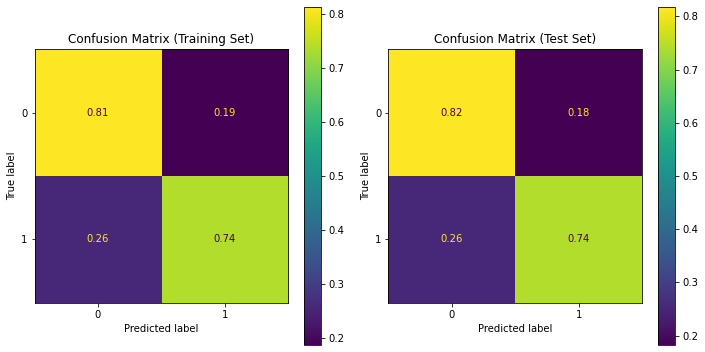

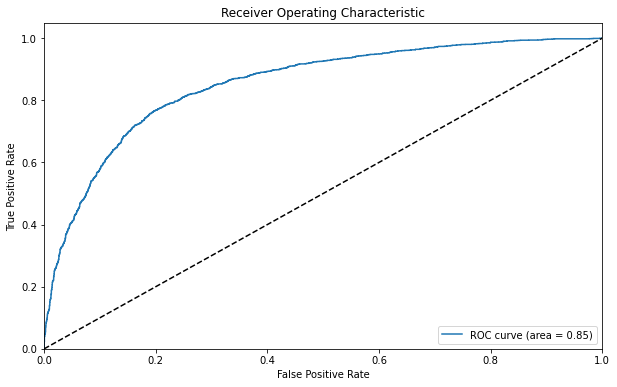

(LogisticRegression(random_state=100),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc...
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['race', 'sex', 'marital_status',
                  

In [37]:
# Instantiate the classifier
logreg = LogisticRegression(random_state=100)

# Instantiate a Scaler
scaler = StandardScaler()

# Call the function with the classifier
train_and_evaluate_model(X, y, logreg, scaler, scale=True)

The baseline Logistic Regression model appears to be performing good.

With a Train ROC AUC Score of 0.78 and a Test ROC AUC Score of 0.78. 

This shows there are no instances of overfitting or underfitting, which can be attributed to the fact that Logistic Regression has regularization built into it, hence minimizing any chances of overfitting.

Also, the Area Under Curve is 0.85, denoting a good performance by the model.

# Hyperparameter Tuning for the baseline Logistic Regression model

Here we will use the `GridSearchCV` function to tune the main parameters for Logistic Regression.

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   53.0s finished


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC Score: 0.8494655129695804
Best Estimator: LogisticRegression(C=0.1, random_state=110, solver='liblinear')
Train ROC AUC Score: 0.7760880989233068
Test ROC AUC Score: 0.7799901945301906


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     11381
           1       0.78      0.74      0.76      9984

    accuracy                           0.78     21365
   macro avg       0.78      0.78      0.78     21365
weighted avg       0.78      0.78      0.78     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2891
           1       0.77      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



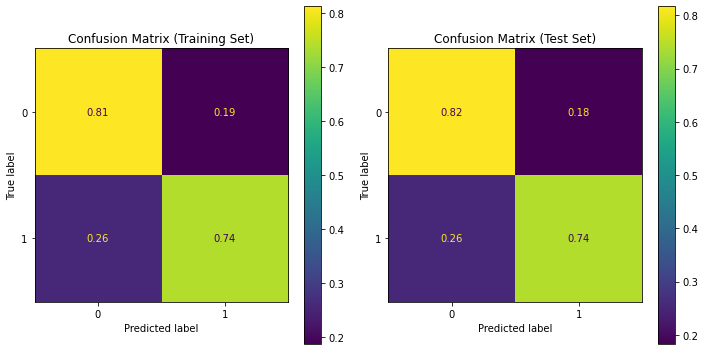

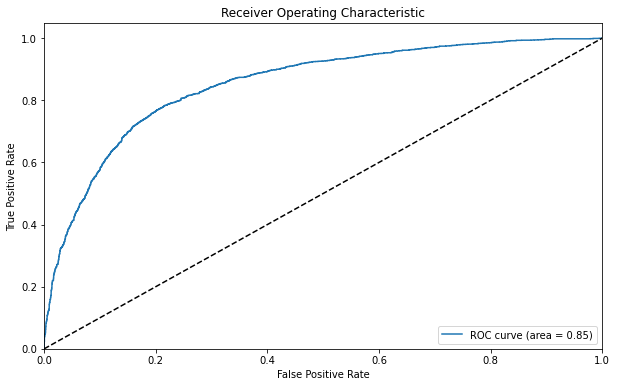

(LogisticRegression(C=0.1, random_state=110, solver='liblinear'),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc...
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['race', 'sex', 'marital_

In [38]:
# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Instantiate the model
logreg_tuned = LogisticRegression(random_state=110)

# Instantiate a Scaler
scaler = StandardScaler()

# Train and evaluate the model with grid search
train_and_evaluate_model(X, y, logreg_tuned, scaler, param_grid, scale=True)

- For the baseline Logistic Regression model, performing a GridSearch for the best hyperparameter combination resulted in a very small improvement of the metrics.

- Our metric for optimization --> **Best ROC-AUC Score: 0.8495**

- So we will try another model, Decision Tree, which has a couple of advantages over the Logistic Regression model:
 - **No Assumptions about Data Distribution:** Decision trees are capable of capturing nonlinear relationships between features and the target variable. They can handle complex interactions and decision boundaries without the need for explicit feature engineering or transformations.
 - **Feature Importance:** Decision trees can provide information about feature importance. By examining the splits in the tree and the resulting impurity or information gain, we can identify which features are most relevant for prediction. This can help in feature selection and understanding the underlying factors driving the predictions.

# Iteration 1: Decision Tree

Train ROC AUC Score: 0.9995492788461539
Test ROC AUC Score: 0.6866846151360155


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11381
           1       1.00      1.00      1.00      9984

    accuracy                           1.00     21365
   macro avg       1.00      1.00      1.00     21365
weighted avg       1.00      1.00      1.00     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      2891
           1       0.66      0.67      0.66      2451

    accuracy                           0.69      5342
   macro avg       0.69      0.69      0.69      5342
weighted avg       0.69      0.69      0.69      5342



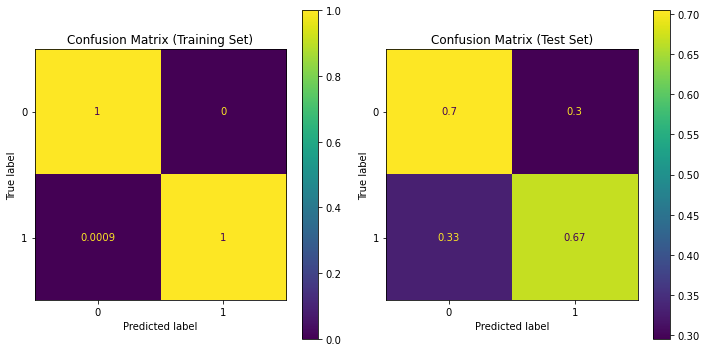

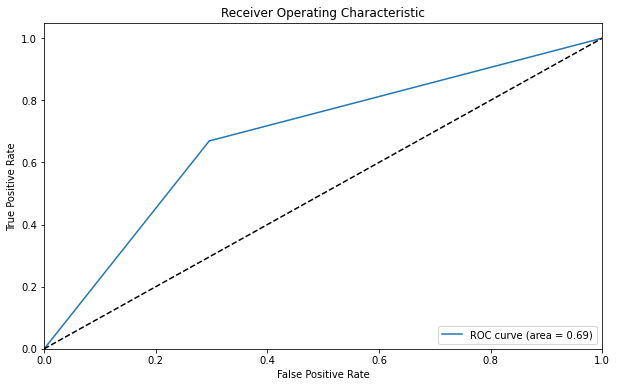

(DecisionTreeClassifier(random_state=1),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median'))]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc_seasonal',
                                   'chronic_med_cond...
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['race', 'sex', 'marital_status',
                                

In [39]:
# Instantiate the classifier
dec_tree = DecisionTreeClassifier(random_state=1)

# Call the function with the classifier
train_and_evaluate_model(X, y, dec_tree, scaler, scale=False)

- From the above performance metrics, we can denote **overfitting**. This is because for the training set, all the metrics have a perfect score of **100%**, while for the test set the metrics have a score of between **65-69%**. This means that the model has learned the training data too well hence is not able to generalize to new unseen dataset, and hence the poor performance on the test set.

- Also, the Train ROC AUC Score is 0.999, while the Test ROC AUC Score is 0.687, further denoting the overfitting.

- Therefore we will need to tune the parameters to minimize the overfitting.

# Hyperparameter Tuning for our Decision Tree model

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   19.8s finished


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best ROC-AUC Score: 0.8255708586681791
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)
Train ROC AUC Score: 0.7488186176522275
Test ROC AUC Score: 0.7498382337396506


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     11381
           1       0.77      0.67      0.72      9984

    accuracy                           0.75     21365
   macro avg       0.76      0.75      0.75     21365
weighted avg       0.76      0.75      0.75     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2891
           1       0.77      0.67      0.72      2451

    accuracy                           0.76      5342
   macro avg       0.76      0.75      0.75      5342
weighted 

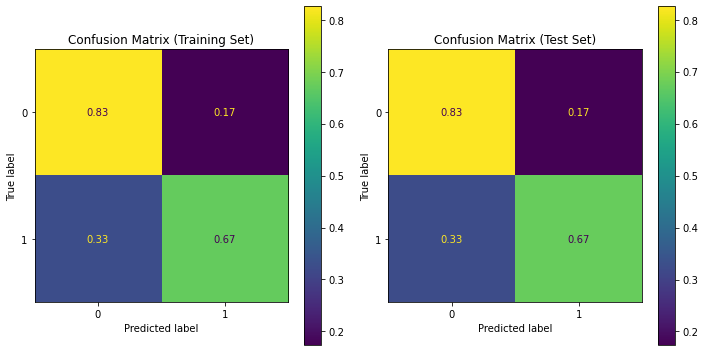

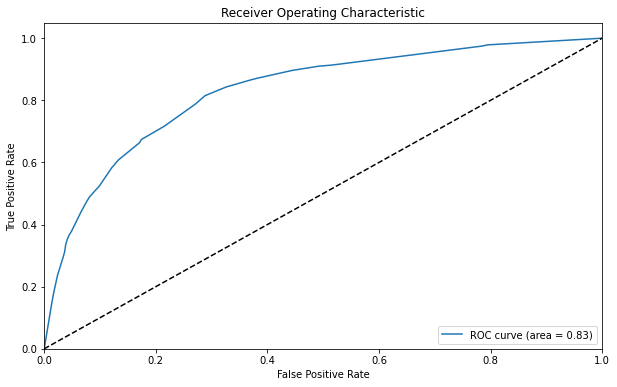

(DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median'))]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc_seasonal',
                                   'chronic_med_cond...
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['race', 'sex', 'marital_status

In [40]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 9, 11],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Instantiate the classifier
dec_tree_tuned = DecisionTreeClassifier(random_state=10)

# Train and evaluate the model with grid search
train_and_evaluate_model(X, y, dec_tree_tuned, scaler, param_grid, scale=False)

- After hyperparameter tuning, our Decision Tree model really improved in terms of reducing the overfitting. The metrics for the test set have also improved, meaning the model is more able to generalize to new unseen dataset.

- The Area Under Curve also has really improved, from 0.69 for the model with default parameters, all the way upto 0.83 for the tuned model.

- Our metric for optimization --> **Best ROC-AUC Score: 0.8256**

- Next we will try another model, K-Nearest Neighbors, which has some advantages over the Decision Tree model:
 - KNN does not involve an explicit training phase: The algorithm simply stores the training data in memory, making the training process fast and memory-efficient. This can be advantageous in situations where training time is a critical factor.
 - Effective with high-dimensional data: KNN can perform well with high-dimensional data because it does not rely on assumptions about the feature space. It considers the distances between data points, which can still be meaningful in high-dimensional spaces. 

# Iteration 2: K-Nearest Neighbors

Train ROC AUC Score: 0.810300043024643
Test ROC AUC Score: 0.7272488191592219


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     11381
           1       0.79      0.80      0.80      9984

    accuracy                           0.81     21365
   macro avg       0.81      0.81      0.81     21365
weighted avg       0.81      0.81      0.81     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      2891
           1       0.70      0.72      0.71      2451

    accuracy                           0.73      5342
   macro avg       0.73      0.73      0.73      5342
weighted avg       0.73      0.73      0.73      5342



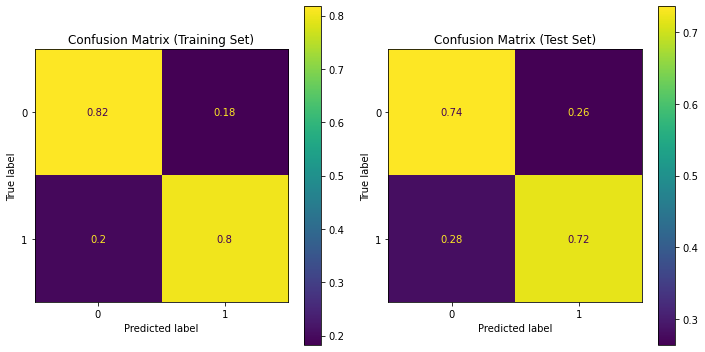

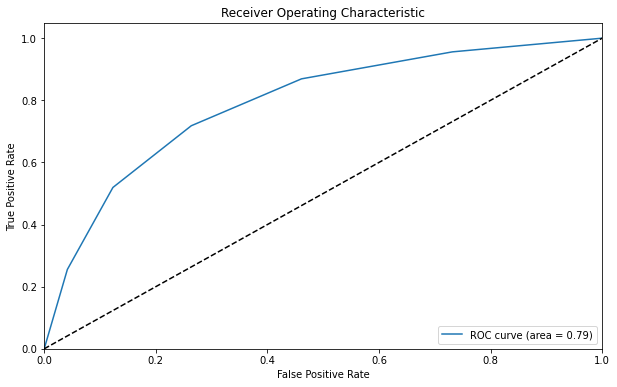

(KNeighborsClassifier(n_jobs=3),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc...
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['race', 'sex', 'marital_status',
                        

In [41]:
# Instantiate the classifier
knn = KNeighborsClassifier(n_jobs=3)

# Instantiate a Scaler
scaler = StandardScaler()

# Call the function with the classifier
train_and_evaluate_model(X, y, knn, scaler, scale=True)

From the above performance metrics, we can denote some overfitting. This is because there is some considerable deviation between the training metric performance and the test metric performance.

For instance, the Train ROC AUC Score is 0.81, while the Test ROC AUC Score: 0.73

This means that the model is not able to generalize well to new unseen dataset, and hence the somewhat poor performance on the test set.

Therefore, we need to tune our parameters.

# Hyperparameter Tuning for our K-NN model

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  6.3min finished


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best ROC-AUC Score: 0.8084535964272946
Best Estimator: KNeighborsClassifier(n_jobs=3, n_neighbors=9, p=1, weights='distance')
Train ROC AUC Score: 0.9995492788461539
Test ROC AUC Score: 0.74878804082677


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11381
           1       1.00      1.00      1.00      9984

    accuracy                           1.00     21365
   macro avg       1.00      1.00      1.00     21365
weighted avg       1.00      1.00      1.00     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2891
           1       0.72      0.74      0.73      2451

    accuracy                           0.75      5342
   macro avg       0.75      0.75      0.75      5342
weighted avg       0.75      0.75      0.75      534

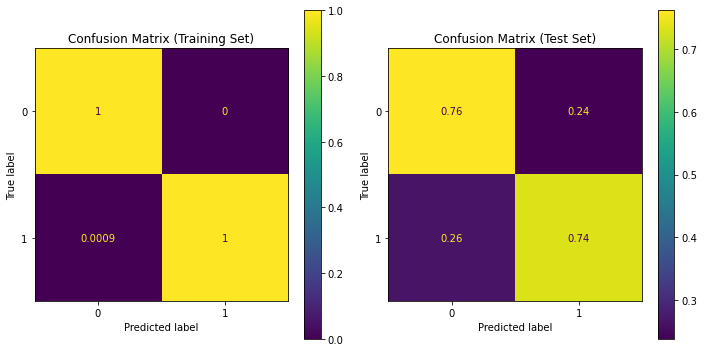

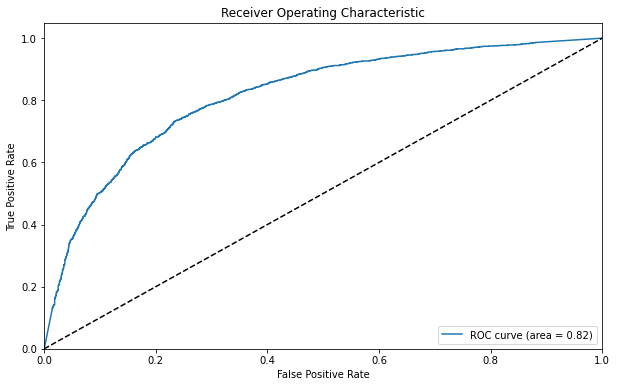

(KNeighborsClassifier(n_jobs=3, n_neighbors=9, p=1, weights='distance'),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median')),
                                                  ('scaler', StandardScaler())]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc...
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['race', 'sex', 'm

In [42]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Instantiate the classifier
knn_tuned = KNeighborsClassifier(n_jobs=3)

# Instantiate a Scaler
scaler = StandardScaler()

# Train and evaluate the model with grid search
train_and_evaluate_model(X, y, knn_tuned, scaler, param_grid, scale=True)

After hyperparameter tuning, there was some serious overfitting. For instance, the Train ROC AUC Score is 0.99, while the Test ROC AUC Score is 0.75

This simply means that the model is not able to generalize well to new data.

Our metric for optimization --> **Best ROC-AUC Score: 0.8085**

- Surprisingly, the KNN model has a worse ROC-AUC score compared to our Decision Tree, despite being a more complex model. This could be due to factors such as:
 - The nature of our dataset, eg. Non-linear relationships: Decision trees can effectively capture non-linear relationships between features and the target variable. They can create complex decision boundaries that are not limited to a fixed number of neighbors. In situations where the decision boundary is highly non-linear, decision trees may outperform KNN.
 
- Also, the high dimensionality of the feature space was impacting the computational cost of K-NN in terms of the training time. As the number of features increases, the distance calculations between instances become more computationally expensive.

- Next we will try another model, Random Forest, which has some advantages over the Decision Tree and K-NN models:
 - Random Forest is an ensemble method that combines multiple decision trees to make predictions. 
 - They can handle complex relationships and interactions between features, and it is more effective at capturing non-linear patterns in the data.
 - It reduces the risk of overfitting compared to a single decision tree by averaging predictions from multiple trees and using random subsets of features.
 - Random Forest provides feature importance measures, which can be helpful for understanding the importance of different features in the model.

# Iteration 3: Random Forest

Train ROC AUC Score: 0.9995923096495734
Test ROC AUC Score: 0.7688590528633086


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11381
           1       1.00      1.00      1.00      9984

    accuracy                           1.00     21365
   macro avg       1.00      1.00      1.00     21365
weighted avg       1.00      1.00      1.00     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2891
           1       0.77      0.73      0.75      2451

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



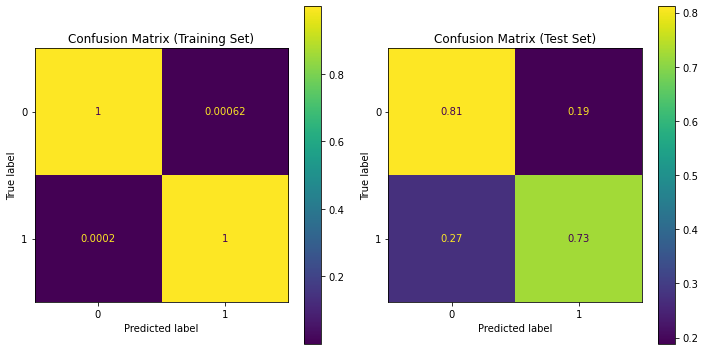

Important Features:
opinion_seas_vacc_effective: 0.09839018006270199
doctor_recc_seasonal: 0.0789813856232584
opinion_seas_sick_from_vacc: 0.037334201495887495
age_group: 0.026722062414008985
opinion_seas_risk: 0.024000668665968356
chronic_med_condition: 0.01835730298072182
behavioral_large_gatherings: 0.016857770697729774
behavioral_touch_face: 0.016291029045924887
behavioral_outside_home: 0.016255728263793807
behavioral_face_mask: 0.015384724242455208
marital_status: 0.01271837797318422
rent_or_own: 0.012643776496426225
health_worker: 0.012466647979448013
behavioral_avoidance: 0.012441796083869189
hhs_geo_region: 0.011472894545701178
employment_status: 0.01136113241259587
income_poverty: 0.011318467063964601
employment_industry: 0.010114925094178577
census_msa: 0.008916647024611377
household_adults: 0.008496660386059847
child_under_6_months: 0.008136238827758309
health_insurance: 0.00795651633495493
behavioral_wash_hands: 0.007800651500819291
household_children: 0.0071328078678056005

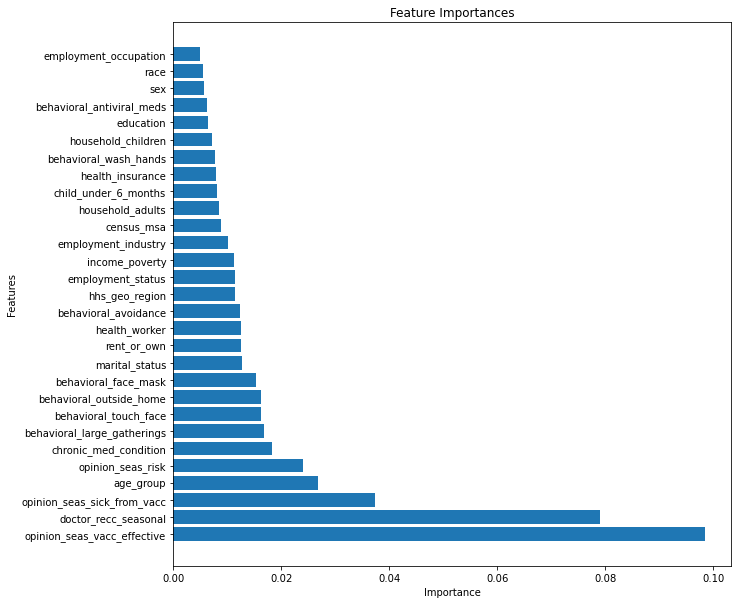

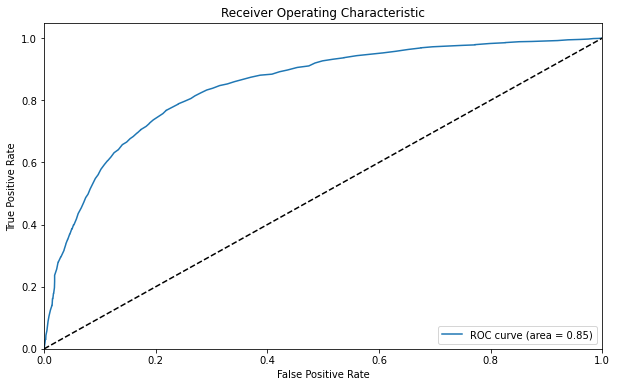

(RandomForestClassifier(n_jobs=3, random_state=3),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median'))]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc_seasonal',
                                   'chronic_med_cond...
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['race', 'sex', 'marital_status',
                      

In [43]:
# Instantiate the classifier
RF = RandomForestClassifier(n_jobs=3, random_state=3)

# Call the function with the classifier
train_and_evaluate_model(X, y, RF, scaler, scale=False)

- From the above performance metrics, we can denote overfitting. This is because for the training set, all the metrics have a perfect score of **100%**, while for the test set the metrics have a score of between **70-79%**. This means that the model has learned the training data too well hence is not able to generalize to new unseen dataset, and hence the poor performance on the test set.

- We can therefore perform some tuning of the parameters to improve on the model performance.

# Hyperparameter Tuning for our Random Forest model

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  6.3min finished


Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 500}
Best ROC-AUC Score: 0.850728105808347
Best Estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=500, n_jobs=3, random_state=30)
Train ROC AUC Score: 0.800447722770632
Test ROC AUC Score: 0.7761583981350979


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     11381
           1       0.82      0.75      0.78      9984

    accuracy                           0.80     21365
   macro avg       0.81      0.80      0.80     21365
weighted avg       0.80      0.80      0.80     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      2891
           1       0.78      0.72      0.75      2451

    accuracy             

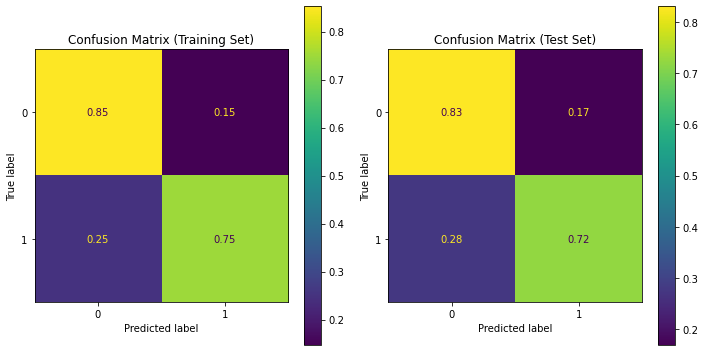

Important Features:
opinion_seas_vacc_effective: 0.19764421830918844
doctor_recc_seasonal: 0.1751731419355435
chronic_med_condition: 0.021275584831064263
opinion_seas_sick_from_vacc: 0.01970430528478569
health_worker: 0.019702733246900937
opinion_seas_risk: 0.01739101056715865
employment_industry: 0.014141901803210628
health_insurance: 0.011910101173051371
behavioral_touch_face: 0.010749670617706975
household_adults: 0.010325855215693723
income_poverty: 0.010101091357527002
census_msa: 0.009970933788470198
behavioral_avoidance: 0.009443866377904515
age_group: 0.008530314212708874
household_children: 0.006996913484898049
employment_occupation: 0.005080188763047929
behavioral_face_mask: 0.004779925357175485
education: 0.004747231149219908
rent_or_own: 0.004406481142112825
hhs_geo_region: 0.004378663620762801
employment_status: 0.004363664363091695
marital_status: 0.004333433032740559
race: 0.004078188865022127
behavioral_large_gatherings: 0.003791128505523183
behavioral_outside_home: 0.0

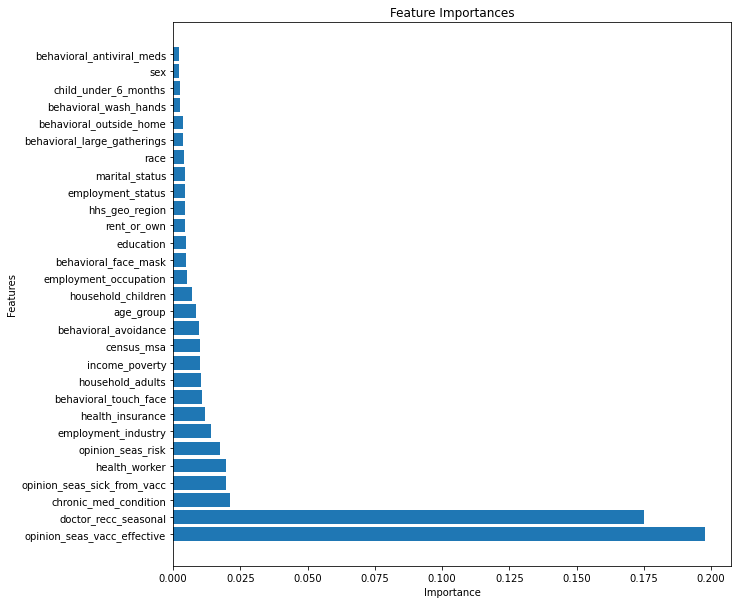

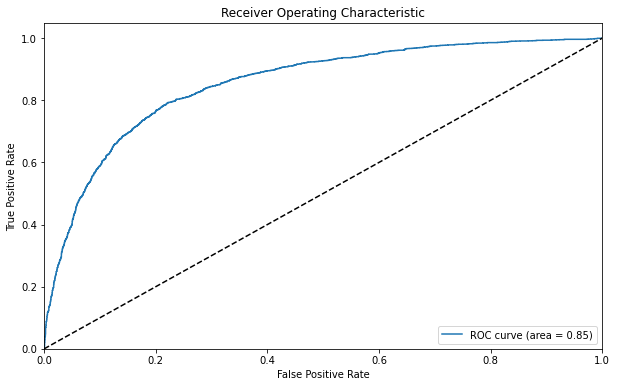

(RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                        n_estimators=500, n_jobs=3, random_state=30),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median'))]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
                                   'behavioral_face_mask',
                                   'behavioral_large_gatherings',
                                   'behavioral_outside_home',
                                   'behavioral_touch_face',
                                   'doctor_recc_seasonal',
                                   'chronic_med_cond...
                                                   OneHotEncoder(handle_unknown='ignor

In [44]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 10],
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 3],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the model
RF_tuned = RandomForestClassifier(n_jobs=3, random_state=30)

# Train and evaluate the model with grid search
train_and_evaluate_model(X, y, RF_tuned, scaler, param_grid, scale=False)

After hyperparameter tuning, the test metrics improved by a bit. For instance, the test ROC-AUC score previously was 77%, and it improved up to 78%.

Our metric for optimization --> **Best ROC-AUC Score: 0.8507**

Next we will try another model, XGBoost, which has some advantages over the Random Forest model:
 - Improved Performance: It leverages the boosting technique, which combines multiple weak models sequentially to create a strong predictive model.
 - Regularization techniques, such as L1 and L2 regularization, to prevent overfitting.
 - Speed and Scalability: XGBoost is generally faster and more computationally efficient than Random Forest, especially when dealing with large datasets. It is designed to handle parallel processing, which enables efficient training on multi-core CPUs and distributed environments.

# Iteration 4: XGBoost

Train ROC AUC Score: 0.8540533054275119
Test ROC AUC Score: 0.7756576812829981


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     11381
           1       0.85      0.84      0.84      9984

    accuracy                           0.85     21365
   macro avg       0.85      0.85      0.85     21365
weighted avg       0.85      0.85      0.85     21365

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2891
           1       0.76      0.75      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



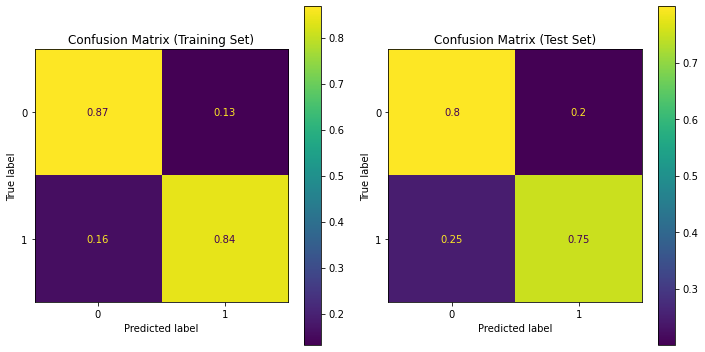

Important Features:
doctor_recc_seasonal: 0.13911586999893188
opinion_seas_vacc_effective: 0.10388284176588058
health_worker: 0.03211463615298271
health_insurance: 0.018045850098133087
opinion_seas_sick_from_vacc: 0.015243425965309143
education: 0.011939501389861107
census_msa: 0.011921459808945656
income_poverty: 0.010932235047221184
employment_occupation: 0.010129748843610287
chronic_med_condition: 0.009513636119663715
race: 0.009424299001693726
household_children: 0.00919344276189804
sex: 0.008957205340266228
child_under_6_months: 0.00887179747223854
employment_industry: 0.008595604449510574
behavioral_touch_face: 0.008511683903634548
behavioral_avoidance: 0.007739978842437267
employment_status: 0.007596735376864672
behavioral_outside_home: 0.007529235910624266
behavioral_wash_hands: 0.007515174802392721
behavioral_antiviral_meds: 0.007501565385609865
opinion_seas_risk: 0.007409825921058655
marital_status: 0.007192964665591717
age_group: 0.007186385802924633
behavioral_large_gatheri

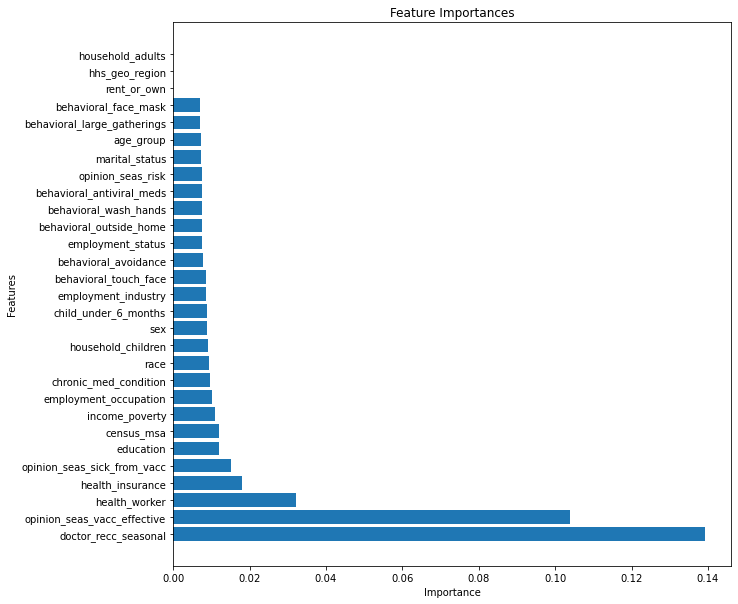

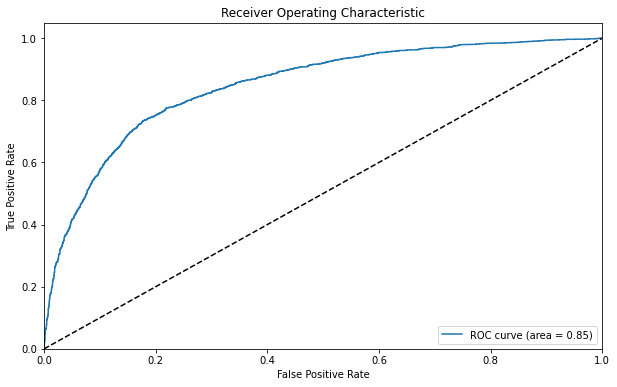

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=3, num_parallel_tree=1, random_state=4,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 ColumnTransformer(transformers=[('numerical_preprocessor',
                                  Pipeline(steps=[('numerical_imputer',
                                                   SimpleImputer(strategy='median'))]),
                                  ['behavioral_antiviral_meds',
                                   'behavioral_wash_hands',
                                   'behavioral_avoidance',
      

In [45]:
# Instantiate the classifier
xgb_model = XGBClassifier(n_jobs=3, random_state=4)

# Call the function with the classifier
train_and_evaluate_model(X, y, xgb_model, scaler, scale=False)

From the above performance metrics, we can denote some small overfitting. This is because there is some considerable deviation between the training metric performance and the test metric performance.

For instance; 
Train ROC AUC Score is 0.85, while
Test ROC AUC Score is 0.77

We therefore try to improve these metrics by tuning the parameters.

# Hyperparameter Tuning for XGBoost

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 13.5min finished


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best ROC-AUC Score: 0.8548219759756374
Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=3, num_parallel_tree=1, random_state=40,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train ROC AUC Score: 0.8030141698292701
Test ROC AUC Score: 0.7862520482748625


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     11381
           1 

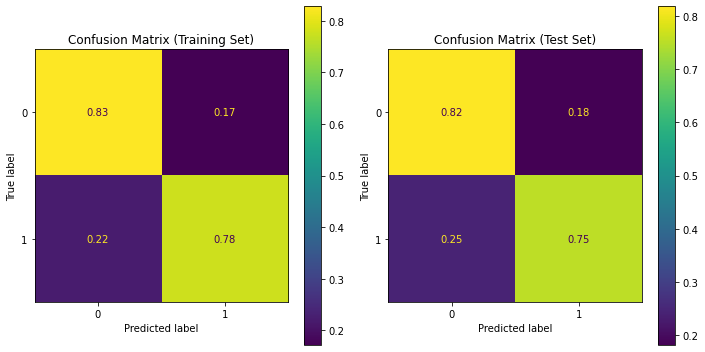

Important Features:
doctor_recc_seasonal: 0.18003249168395996
opinion_seas_vacc_effective: 0.12589165568351746
health_worker: 0.02580776810646057
health_insurance: 0.018915953114628792
opinion_seas_sick_from_vacc: 0.014913746155798435
income_poverty: 0.013555905781686306
household_adults: 0.011706712655723095
census_msa: 0.01170271821320057
race: 0.010168883018195629
chronic_med_condition: 0.008444851264357567
behavioral_touch_face: 0.008426936343312263
education: 0.008284030482172966
employment_occupation: 0.007385272532701492
employment_industry: 0.0070296479389071465
household_children: 0.006790476851165295
behavioral_avoidance: 0.006556257139891386
sex: 0.006166083738207817
behavioral_outside_home: 0.006091049872338772
rent_or_own: 0.006073373835533857
marital_status: 0.006039011757820845
opinion_seas_risk: 0.005893347784876823
employment_status: 0.005727928597480059
behavioral_face_mask: 0.005236737430095673
behavioral_antiviral_meds: 0.005159667693078518
behavioral_wash_hands: 0.

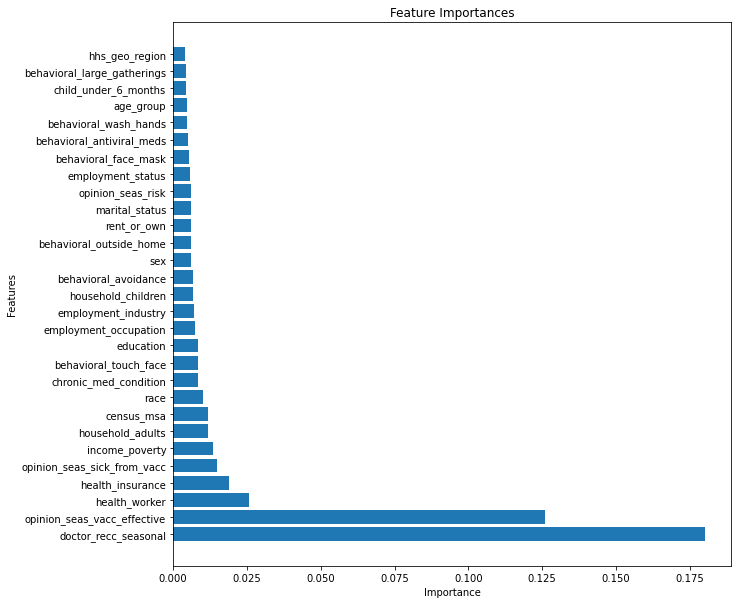

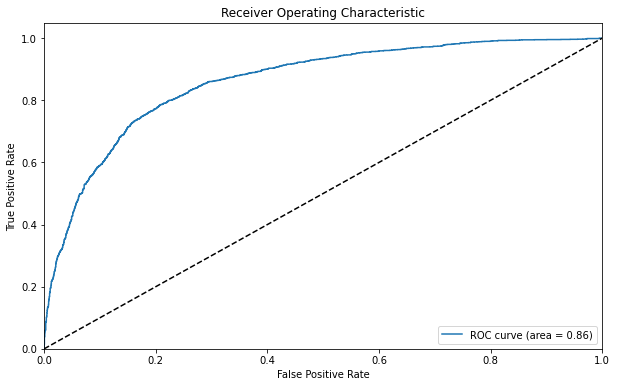

In [46]:
# Define the hyperparameters to tune

param_grid = {
    'max_depth': [ 5, 7, 9],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instantiate the model
xgb_tuned = XGBClassifier(n_jobs=3, random_state=40)

# Train and evaluate the model with grid search
model, preprocessor = train_and_evaluate_model(X, y, xgb_tuned, scaler, param_grid, scale=False)

After hyperparameter tuning, the test metrics improved by a bit. 

For instance:
Train ROC AUC Score is 0.80, while the
Test ROC AUC Score is 0.79.

Ideally you want to have your train and test metrics at par, which signifies that the model is able to generalize to new unseen data.

From the GridSearch cross-validation of 3 folds;
- Our metric for optimization --> **Best ROC-AUC Score is 0.8548**

### Summary of all the tuned models in terms of ROC-AUC Score:

1. Baseline Logistic Regression - 0.8495
2. Decision Tree - 0.8256
3. KNN - 0.8085
4. Random Forest - 0.8507 
5. XGBoost - 0.8548

- XGBoost is therefore our **best and final model** with the best ROC-AUC score of **0.8548**, as compared to all other models.

- Below we define a function for plotting the key/important features from our best model.

In [47]:
import plotly.graph_objects as go

# Define a function to generate the plots for the important features

def create_vaccination_rate_plot(feature, target, data, x_label, y_label, plot_title, 
                                 x_tick_labels=None, plot_width=700, plot_height=500):
    mean_vaccination_rate = data.groupby(feature)[target].mean().reset_index()

    # Define a list of colors to assign to each category
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown']

    fig = go.Figure(data=[
        go.Bar(
            x=mean_vaccination_rate[feature],
            y=mean_vaccination_rate[target],
            marker=dict(
                color=colors[:len(mean_vaccination_rate[feature])],
                line=dict(width=1, color='black')
            ),
            textposition='none'
        )
    ])

    fig.update_layout(
        title=plot_title,
        xaxis=dict(title=x_label, ticktext=x_tick_labels, tickvals=mean_vaccination_rate[feature]),
        yaxis=dict(title=y_label),
        showlegend=False,
        width=plot_width,
        height=plot_height
    )

    return fig

# Conclusions

 

### 1.  Features that were the most important in predicting vaccination status include:

1. doctor_recc_seasonal
2. opinion_seas_vacc_effective
3. health_worker
4. health_insurance
5. opinion_seas_sick_from_vacc
6. income_poverty
7. education
8. race
9. chronic_med_condition
10. behavioral_touch_face

### i) Doctor's Recommendation

This is the most important predictive feature, i.e. having a doctor recommend getting the flu vaccine. 

From the graph, people who had their doctors recommend to them the vaccine, had a mean vaccination rate of 74% and hence were substantially more likely to have gotten vaccinated.

In [48]:
fig = create_vaccination_rate_plot('doctor_recc_seasonal', 'seasonal_vaccine', merged_df, 
                                   'Doctor Recommendation for Seasonal Vaccine', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Doctor Recommendation for Seasonal Vaccine',
                                    x_tick_labels=['Not Recommended', 'Recommended'],
                                    plot_width=700, plot_height=500)

fig.show()

### ii) Respondent's opinion about seasonal flu vaccine effectiveness.

From the graph, people that rate the vaccine as 5 (Very Effective) have a mean vaccination rate of 70% and hence are more likely to have gotten the vaccine as compared to the other respondents. 

In [49]:
fig = create_vaccination_rate_plot('opinion_seas_vacc_effective', 'seasonal_vaccine', merged_df, 
                                   'Vaccine Effectiveness Rating', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Vaccine Effectiveness Rating',
                                    x_tick_labels=['Not at all effective', 'Not very effective', "Don't know", 
                                                   'Somewhat effective', 'Very effective'],
                                    plot_width=700, plot_height=500)

fig.show()

### iii) Health Worker

From the graph, Health workers had a higher mean vaccination rate of 65% as compared to Non-Health workers whose rate was 45%.

Health workers are more likely to get the flu vaccine than the rest of the population. Individuals in these professions are also more likely to be well informed about the risks and benefits of vaccination and potential dangers of contracting the seasonal flu.

In [50]:
fig = create_vaccination_rate_plot('health_worker', 'seasonal_vaccine', merged_df, 
                                   'Health Worker', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Health Worker',
                                    x_tick_labels=['Non-Health', 'Health Worker'],
                                    plot_width=700, plot_height=500)

fig.show()

### iv) Health Insurance

From the graph, People with insurance had a higher mean vaccination rate of 54% as compared to 23% for people with no insurance.

People with health insurance are more likely to have gotten the vaccine whereas people without health insurance were very unlikely to have gotten the vaccine. This may be because individuals without health insurance are less likely to see a doctor very often, so they may not have the vaccine recommended to them by a doctor (a top predictor), and they may also be less informed about the effectiveness and safety of the vaccine.

In [51]:
merged_df['health_insurance'] = features_df['health_insurance']

fig = create_vaccination_rate_plot('health_insurance', 'seasonal_vaccine', merged_df, 
                                   'Health Insurance', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Health Insurance',
                                    x_tick_labels=['No Insurance', 'Has Insurance'],
                                    plot_width=700, plot_height=500)

fig.show()

### v) Perceived Risk of Getting Sick from Flu Vaccine

Here a higher rating means the individual is more concerned about getting sick from the flu vaccine itself. 

People are more likely to get the vaccine if they are less worried about side effects. 

From the graph, people with a perceived risk rating of 1 (Not at all worried) had the highest mean vaccination rate at 51%.

In [52]:
fig = create_vaccination_rate_plot('opinion_seas_sick_from_vacc', 'seasonal_vaccine', merged_df, 
                                   'Perceived Risk Rating', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Perceived Risk Rating',
                                    x_tick_labels=['Not at all worried', 'Not very worried',"Don't know", 
                                                   'Somewhat worried','Very worried'],
                                    plot_width=700, plot_height=500)

fig.show()

### vi) Income Level

This is in reference to the household annual income of respondents with respect to 2008 Census poverty thresholds.

From the graph, individuals living with a household income below the 2008 Census poverty threshold are less likely to get the vaccine with a mean vaccination rate of 36%, as compared to the other income categories.

In [53]:
create_vaccination_rate_plot('income_poverty', 'seasonal_vaccine', merged_df, 
                             'Income Level', 
                             'Mean Vaccination Rate', 
                             'Mean Vaccination Rate by Income Level',
                             plot_width=700, plot_height=500)

### vii) Race

From the graph, the mean vaccination rates is fairly distributed amongst the different races, with White people being the highest likely to get vaccinated (a mean vaccination rate of 49%), while Hispanic people having the lowest vaccination rate at 34%.

In [54]:
create_vaccination_rate_plot('race', 'seasonal_vaccine', merged_df, 
                             'Race', 
                             'Mean Vaccination Rate', 
                             'Mean Vaccination Rate by Race',
                             plot_width=700, plot_height=500)

### viii) Chronic Medical Condition

From the graph, people with a chronic medical condition such as asthma or any other lung condition, diabetes, a heart condition or a weakened immune system, are highly likely to get vaccinated, with a mean vaccination rate of 60%, as compared to people with no chronic medical condition who have a vaccine uptake rate of 42%.

In [55]:
fig = create_vaccination_rate_plot('chronic_med_condition', 'seasonal_vaccine', merged_df, 
                                   'Chronic Medical Condition', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Chronic Medical Condition',
                                    x_tick_labels=['No Condition', 'Has a Condition'],
                                    plot_width=700, plot_height=500)

fig.show()

### ix) Behavior (touching face)

From the graph, people who have avoided touching their face(eyes, nose, or mouth) have a higher mean vaccination rate of 51%.

This could be due to the fact that they want to combine all the efforts at their disposal in preventing contracting the flu.

In [56]:
fig = create_vaccination_rate_plot('behavioral_touch_face', 'seasonal_vaccine', merged_df, 
                                   'Behavior (touching face)', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Behavior (touching face)',
                                    x_tick_labels=['Has not avoided', 'Has avoided'],
                                    plot_width=700, plot_height=500)

fig.show()

### x) Education

The proportion of people vaccinated within each level of education category increases with increasing level of education. 

As we can see from the graph, college graduates had the highest mean vaccination rate at 51%.

In [57]:
fig = create_vaccination_rate_plot('education', 'seasonal_vaccine', merged_df, 
                                   'Education Level', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Education Level',
                                    x_tick_labels=[],
                                    plot_width=700, plot_height=500)

fig.show()

### 2. How behavioral preventive measures impact vaccine uptake

Overall, the `behavior_score` variable provides a quantitative representation of individuals' engagement in flu-preventive behaviors/measures. The majority of individuals demonstrate a moderate to high level of caution, as indicated by their behavior scores. The distribution of scores highlights the variability in behavior across the population, with some individuals exhibiting lower levels of engagement and others being more proactive in flu prevention.

From the graph, people who engage in at least 6 out of the 7 preventive measures have a mean vaccination rate of 53%.

In [58]:
fig = create_vaccination_rate_plot('behavior_score', 'seasonal_vaccine', merged_df, 
                                   'Behavioral Attributes Score', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Behavioral Attributes Score',
                                    x_tick_labels=[],
                                    plot_width=700, plot_height=500)

fig.show()

### 3. The best model for predicting vaccine uptake

The best and final model is the tuned XGBoost based on the below:

- Best ROC-AUC Score from the GridSearchCV: **0.8548**
 - With a score of 0.8548, our model is showing a high level of discrimination ability, suggesting that it can effectively separate the positive and negative instances (vaccine uptake and non-uptake) based on the input features.
 - In the context of false positives and false negatives, a false positive occurs when the model predicts that an individual will receive the seasonal flu vaccine (vaccine uptake), but in reality, they do not get vaccinated; while a false negative occurs when the model predicts that an individual will not receive the seasonal flu vaccine (non-uptake), but they actually get vaccinated. Therefore, with an ROC-AUC score of 0.8548, it suggests that the model's ability to minimize both false positives and false negatives is reasonably high/relatively good.

- Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

- The model is not overfit. This is evident from the Train ROC AUC Score of 0.8030, and the Test ROC AUC Score of 0.7863. Ideally you want to have your train and test metrics at par, which signifies that the model is able to generalize to new unseen data. In addition, the model has regularization built into it.

- The model is computationally efficient. This is because it took only 11 minutes to perform a grid-search of 144 fits.

- Based on the `feature_importances` function of the model, we are able to get insights on the most important features that contribute to high uptake of seasonal flu vaccines, and hence better predictions by our model. 

### Building a Predictive System using the unseen validation data

In [59]:
# Load the validation data
validation_df = pd.read_csv(data_path + "\\test_set_features.csv", index_col="respondent_id")

- Making sure that our `validation_df` has the same features and undergoes through the same preprocessing steps as the data we used to train our model.
- This will enable for consistency and accurate assessment of our trained model in terms of its ability to generalize to new unseen datasets.

In [60]:
# Drop unnecessary columns
validation_df = validation_df.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 
                                          'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                                          'opinion_h1n1_sick_from_vacc'])

- Below we define a function for extracting a list of feature names from our `ColumnTransformer` object.

In [61]:
# Get feature names from the Column Transformer

def get_feature_names_from_column_transformer(column_transformer):
    """
    Get feature names from a column transformer object.

    Parameters:
        column_transformer (ColumnTransformer): The fitted column transformer.

    Returns:
        list: List of feature names.
    """
    output_features = []

    for name, transformer, features in column_transformer.transformers_:
        if isinstance(transformer, Pipeline):
            transformer = transformer[-1]

        if hasattr(transformer, 'get_feature_names_out'):
            output_features.extend(transformer.get_feature_names_out(input_features=features))
        elif hasattr(transformer, 'get_feature_names'):
            output_features.extend(transformer.get_feature_names(input_features=features))
        else:
            output_features.extend(features)

    return output_features


- Below we define a function to process the validation data using the `preprocessor` object from our training data. This will ensure consistency between our training data and validation data.

In [62]:
# Define a function to preprocess the validation data

def preprocess_data(data, preprocessor):
    """
    Function to preprocess data using the given preprocessor.

    Parameters:
        data (pd.DataFrame): The data to be preprocessed.
        preprocessor (ColumnTransformer): The preprocessor object used for transformation.

    Returns:
        pd.DataFrame: The preprocessed data.
    """

    # Transform the data using the preprocessor
    preprocessed_data = preprocessor.transform(data)

    # Get the updated feature names
    feature_names = get_feature_names_from_column_transformer(preprocessor)

    # Convert the preprocessed data back to a DataFrame
    preprocessed_df = pd.DataFrame(preprocessed_data, columns=feature_names)

    return preprocessed_df


- Call the `preprocess_data` function.

In [63]:
# Call the preprocess_data function
preprocessed_validation_df = preprocess_data(validation_df, preprocessor)

In [64]:
# List of categorical column names to one-hot encode
categorical_columns = ['race', 'sex', 'marital_status', 'rent_or_own',
                        'employment_status', 'census_msa',  
                        'hhs_geo_region', 'employment_industry', 'employment_occupation']

# List of column names to ordinal-encode
ordinal_columns = ['age_group', 'education', 'income_poverty', 'opinion_seas_risk']

# List of numerical column names
numerical_columns = ['behavioral_antiviral_meds', 'behavioral_wash_hands',
                     'behavioral_avoidance', 'behavioral_face_mask', 
                     'behavioral_large_gatherings', 'behavioral_outside_home',
                     'behavioral_touch_face', 'doctor_recc_seasonal',
                     'chronic_med_condition', 'child_under_6_months', 'health_worker',
                     'health_insurance', 'opinion_seas_vacc_effective', 'household_children',
                     'opinion_seas_sick_from_vacc', 'household_adults']


- Below we define a function for making predictions that takes in our best model and the preprocessed validation data; and finally it returns a Pandas Series of the predictions.

In [65]:
# Define a function for making predictions.

def make_prediction(model, preprocessed_validation_df):
    """
    Function to make predictions using the trained model.

    Parameters:
        model: The trained model.
        preprocessed_validation_df (pd.DataFrame): The preprocessed validation data.

    Returns:
        pd.Series: The model's predictions.
    """

    # Get the feature names from the XGBoost model
    feature_names = model.get_booster().feature_names

    # Reorder the preprocessed validation data columns to match the feature names
    preprocessed_validation_df = preprocessed_validation_df[feature_names]

    # Make predictions using the trained model
    predictions = model.predict(preprocessed_validation_df)

    return pd.Series(predictions, index=preprocessed_validation_df.index)


- Below we create a mapping dictionary to map the column names from our `preprocessed_validation_df` to the feature names from our best XGBoost model, so as to maintain consistency.

In [66]:
# Get the feature names from the XGBoost model
feature_names = model.get_booster().feature_names

# Get the column names from the preprocessed_validation_df
column_names = preprocessed_validation_df.columns

# Create a mapping dictionary to map column names to feature names
column_to_feature_mapping = dict(zip(column_names, feature_names))

# Rename the columns in preprocessed_validation_df using the mapping
preprocessed_validation_df.rename(columns=column_to_feature_mapping, inplace=True)


- Call the `make_prediction` function.

In [67]:
# Call the make_prediction function
predictions = make_prediction(model, preprocessed_validation_df)

- Below we compare and visualize our predictions to the actual labels, to get a sense of how our best model is performing.

In [68]:
# Obtain the actual labels
validation_labels = labels_df['seasonal_vaccine']

# Compare predictions with actual labels
comparison_df = pd.DataFrame({'Actual Labels': validation_labels, 'Predictions': predictions})

# Count the occurrences of each label in the actual labels and predictions
actual_label_counts = comparison_df['Actual Labels'].value_counts()
predicted_label_counts = comparison_df['Predictions'].value_counts()

# Create the DataFrame containing the actual and predicted label counts
actual_label_counts_df = pd.DataFrame(actual_label_counts).reset_index()
predicted_label_counts_df = pd.DataFrame(predicted_label_counts).reset_index()

# Create the bar plots using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=actual_label_counts_df['index'], y=actual_label_counts_df['Actual Labels'], 
                     name='Actual Labels'))
fig.add_trace(go.Bar(x=predicted_label_counts_df['index'], y=predicted_label_counts_df['Predictions'],
                     name='Predictions'))

# Update the layout
fig.update_layout(title='Comparison of Actual Labels and Predictions',
                  xaxis=dict(title='Seasonal Vaccine (1: Yes, 0: No)'),
                  yaxis=dict(title='Count'),
                  barmode='group')

# Show the plot
fig.show()

- From the plot above, we can see that our model is actually performing quite well in predicting both classes! With just some minor inaccuracy.

# Recommendations

1. Collaboration with healthcare and insurance providers: The Ministry of Health should work hand in hand with healthcare and insurance providers to increase the number of population covered by insurance. This will encourage individuals to undertake medical checkups as this will increase the consumption of information, i.e. getting a doctor's recommendation. This will therefore help in promoting and increasing seasonal flu vaccine uptake.


2. Identify High-Risk Groups: Utilize the predictive model to identify high-risk groups or populations that have historically shown low seasonal vaccine uptake. These high-risk groups include infants below 6 months, the elderly above 65 years, the medical/healthcare practitioners, and people with chronic medical conditions. This will help in promoting seasonal flu vaccine uptake.


3. Targeted Messaging and Outreach: Develop targeted communication strategies that address specific concerns. For example, debunking myths about the effects of vaccination, and how to maintain health practices that prevent spread of the flu. This will help in promoting seasonal flu vaccine awareness and uptake.


4. Effective Resource Allocation: The Ministry of Health should utilize the predictive model for effective allocation of resources such as human capital, funds, vaccines and other materials. For example, deploying human capital and more vaccines to areas with high vaccine-uptake, as opposed to deploying more vaccines to areas with low vaccine-uptake, as that will lead to wastages.


5. Policy-formulation: The Ministry of Health should prioritize policy development aimed at addressing public behavioral aspects regarding flu prevention measures, eg. wearing of face masks, minimizing large gatherings and regular washing of hands. Additionally, it should focus on ensuring widespread vaccination coverage among the population to effectively prevent the uncontrolled spread of the disease.

# Next Steps

1. Monitoring and Evaluation: Continuously monitor the impact of the interventions and communication strategies implemented. Evaluate the effectiveness of different approaches by comparing the vaccine uptake rates before and after the interventions.


2. Regularly update the predictive model with new data to refine targeting strategies and improve future interventions.